<a href="https://colab.research.google.com/github/DmitryKutsev/DeepHW/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

from sklearn.metrics import classification_report

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.metrics import accuracy_score

import time

In [2]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [3]:
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...





/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [4]:
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
train_dataset.targets = train_dataset.targets[(train_dataset.targets == 3) | (train_dataset.targets == 7)]

test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 7)]
test_dataset.targets = test_dataset.targets[(test_dataset.targets == 3) | (test_dataset.targets == 7)]

train_dataset.targets = (train_dataset.targets == 7).long()
test_dataset.targets = (test_dataset.targets == 7).long()
#what is .long()?

In [5]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

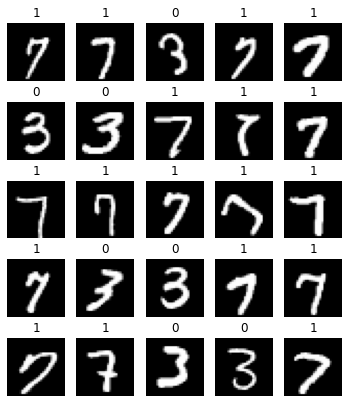

In [6]:
X, y = next(iter(train_loader))
X = X.numpy()
y = y.numpy()

plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

In [7]:
for x, y in train_loader:
    break

In [8]:
x.shape

torch.Size([128, 1, 28, 28])

In [9]:
x.view(x.shape[0], -1).numpy().shape

(128, 784)

In [10]:

for x, y in train_loader:
    x = x.view(x.shape[0], -1).numpy()
    y = y.numpy()
    break

In [11]:

# количество эпох - полных проходов по датасету
epochs = 3

for n_epoch in range(epochs):
    
    dataset_passed_samples = 0
    
    for x, y in train_loader:
        
        # вот здесь мы могли бы как-то манипулировать с данными
        # например, учить, но пока этого делать не будет
        # только демонстрация
        
        time.sleep(0.05)
        
        dataset_passed_samples += x.shape[0]
        
        dataset_passed_percent = dataset_passed_samples * 100 / train_loader.dataset.data.shape[0]
        
        print(f'Эпоха - {n_epoch + 1}, прошли - {dataset_passed_percent:.2f} % датасета', end='\r')
        
    print('\r')

Эпоха - 1, прошли - 100.00 % датасета
Эпоха - 2, прошли - 100.00 % датасета
Эпоха - 3, прошли - 100.00 % датасета


In [12]:
# таким образом мы создаем матрицу 64 на 512 с рандомными значениями
x = np.random.rand(64, 512)
x

array([[0.25332669, 0.11196436, 0.29986862, ..., 0.30874705, 0.36030476,
        0.84059588],
       [0.71113134, 0.36036083, 0.98354337, ..., 0.61832181, 0.75297999,
        0.3469137 ],
       [0.2637261 , 0.82588519, 0.31839481, ..., 0.51215991, 0.8099283 ,
        0.82235128],
       ...,
       [0.15695993, 0.24222599, 0.71319015, ..., 0.50287185, 0.2381819 ,
        0.85835584],
       [0.33554394, 0.09773969, 0.95754036, ..., 0.51006564, 0.25953111,
        0.33871069],
       [0.83642975, 0.53314929, 0.31852472, ..., 0.23101381, 0.90272037,
        0.23055187]])

In [13]:
# большинство функций применяются к каждому элементу массива
# здесь мы каждый элемент массива возвели в квадрат и прибавили к получившемуся значению логарифм элемента матрицы 
x ** 2 + np.log(x)

array([[-1.30890096, -2.17703865, -1.11448964, ..., -1.07990822,
        -0.89098555,  0.53295719],
       [ 0.16480964, -0.89078953,  0.95076402, ..., -0.09842437,
         0.28326224, -0.93833013],
       [-1.26329275,  0.49078684, -1.04308787, ..., -0.40681059,
         0.44517428,  0.48067399],
       ...,
       [-1.82712832, -1.3592107 ,  0.17063298, ..., -0.43453982,
        -1.37798998,  0.58403821],
       [-0.97941264, -2.31589453,  0.87349613, ..., -0.41304889,
        -1.28152231, -0.96788402],
       [ 0.52100198, -0.34470565, -1.04259721, ..., -1.41191041,
         0.71256162, -1.41412523]])

In [14]:
y = np.random.rand(512, 1024)
# скалярное произведение
res = np.dot(x, y)

In [15]:
res.shape == (x.shape[0], y.shape[1])

True

In [16]:
x.shape

(64, 512)

In [17]:
res.shape

(64, 1024)

In [19]:
x = np.random.rand(64, 512)
y = np.random.rand(512, 1024)

In [20]:

res.shape == (x.shape[0], y.shape[1])

True

In [21]:
x = np.random.rand(64, 512)
y = np.random.rand(512, 1024)


for x, y in train_loader:
    x = x.view(x.shape[0], -1).numpy()
    y = y.numpy()
    break


In [18]:

learning_rate = 0.01
epochs = 3

# w1 = 
# b1 = 
# w2 = 
# b2 = 

losses = []

for n_epoch in range(epochs):
    
    print(f'Epoch: {n_epoch + 1}')
    
    for x, y in train_loader:
        
        x = x.view(x.shape[0], -1).numpy()
        y = np.expand_dims(y.numpy(), 1)
        
        ### КОД СЮДА ###
        
        # forward
        
        # рассчет bce
        # не забудьте добавить это значение в массив losses
        
        # backward
        
        # gradient descent

Epoch: 1
Epoch: 2
Epoch: 3
